In [4]:
import numpy as np
from sympy import *
from sympy.physics.vector import ReferenceFrame
import matplotlib.pyplot as plt
%matplotlib notebook

In [26]:
C = ReferenceFrame('C')

In [27]:
t = symbols('t')

In [28]:
vector = cos(t)*C.x + sin(t)*C.y; vector

cos(t)*C.x + sin(t)*C.y

In [29]:
vector.subs(t,2)

cos(2)*C.x + sin(2)*C.y

In [30]:
vector

cos(t)*C.x + sin(t)*C.y

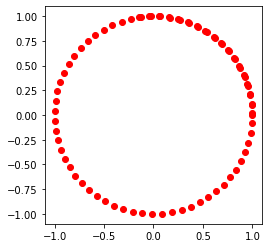

In [37]:
time = 0 
fig = plt.figure()
ax = plt.axes()    
while time<=8:
    plt.plot(cos(time),sin(time), 'ro')
    time = time + 0.1
    
ax.set_aspect('equal')
plt.show()

In [41]:
velocity = vector.diff(t,C); velocity

- sin(t)*C.x + cos(t)*C.y

In [43]:
vector.dot(velocity)

0

In [47]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

UsageError: Line magic function `%install_ext` not found.


In [45]:
%load_ext version_information

In [48]:
version_information

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 5.3.0 29 generic x86_64 with debian buster sid
Sun Feb 16 15:25:51 2020 -03

In [87]:
from sympy.plotting.plot import plot3d_parametric_line, plot3d_parametric_surface

In [5]:
x,y,z,u,v, t = symbols('x y z u v t')

In [11]:
def curve(x,y,z):
    return x,y,z

In [91]:
cur1 = curve(cos(t),sin(t),t)
cur2 = curve(sin(t),-cos(t),t)

In [76]:
type(cur1)

tuple

In [82]:
cur[1]

sin(t)

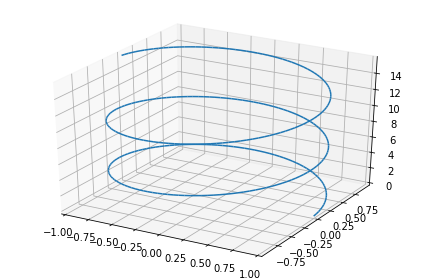

In [79]:
plot3d_parametric_line(*cur1, (t,0,5*pi))

In [80]:
def dot(x,y):
    assert len(x)==len(y), "Two vectors must have the same dimension" 
    result = 0
    for i in range(len(x)):
        result += x[i]*y[i]
    return result

In [81]:
dot(cur1,cur2)

t**2

In [109]:
def substitute(f,*args):
    '''
    the number of the variables of the vectorial function 'f' must be eqaul to the given parameters.
    
    
    '''
    parameters = set()
    result=[]
    for component in f:
        parameters.update(component.free_symbols)
        
    assert len(args)==len(parameters), "Error"
    
    for component in f:
        for variable in args:
            component = component.subs(variable[0],variable[1])
        result.append(component)
    return tuple(result) 

In [122]:
if type(2)!=float:
    print(True)

True


In [131]:
from sympy import *

In [134]:
isinstance(cos(t),tuple(core.all_classes))

True

In [35]:
cur1[2].free_symbols

{t}

In [60]:
len(((x,2),(t,3)))

2

In [58]:
a[0]

TypeError: 'int' object is not subscriptable

In [83]:
def surface(x,y,z):
    return x,y,z

In [86]:
surf1 = surface(v*cos(u),v*sin(u),u)

<IPython.core.display.Javascript object>


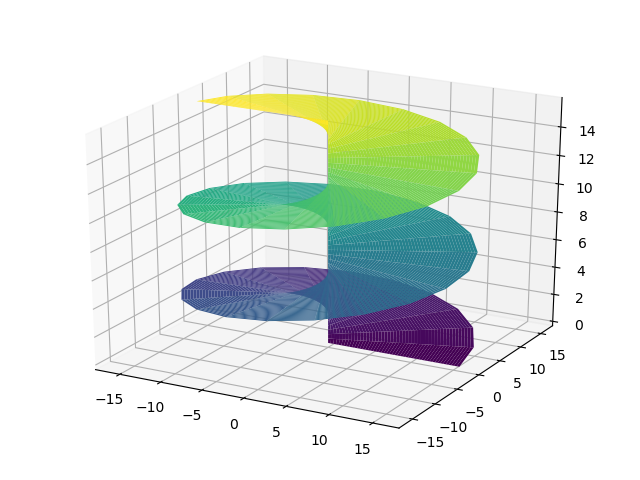

In [90]:
plot3d_parametric_surface(*surf1, (u,0,5*pi),(v,0,5*pi))

<IPython.core.display.Javascript object>


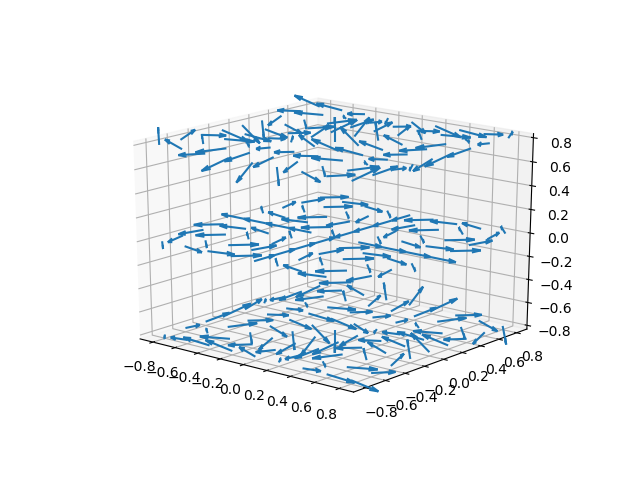

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True)

plt.show()

In [17]:
def Vector_Plot_3D_mayavi(f, a, b, c, mask_points=1, scale_factor=3, mesh_size=10):
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    %gui qt
    import numpy as np
    from mayavi import mlab   
    
    
# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    src = mlab.pipeline.vector_field(u, v, w)
    mlab.pipeline.vectors(src, mask_points=mask_points, scale_factor=scale_factor)

In [5]:
from sympy import *
x , y,z = symbols('x y z')
Vector_Plot_3D((x**2,y**2,z**2), (x,-10,10),(y,-10,10),(z,-10,20))

NameError: name 'Vector_Plot_3D' is not defined

In [10]:
%gui qt
from mayavi import mlab
import numpy as np
x, y, z = np.mgrid[0:1:20j, 0:1:20j, 0:1:20j]

u =    np.sin(np.pi*x) * np.cos(np.pi*z)
v = -2*np.sin(np.pi*y) * np.cos(2*np.pi*z)
w = np.cos(np.pi*x)*np.sin(np.pi*z) + np.cos(np.pi*y)*np.sin(2*np.pi*z)
#src = mlab.pipeline.vector_field(u, v, w)
#mlab.pipeline.vectors(src, mask_points=20, scale_factor=3.)
mlab.quiver3d(u,v,w)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [27]:
def Vector_Plot(f:Tuple, a:Tuple, b:Tuple):
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    xrange = np.linspace(a[1],a[2],15)
    yrange = np.linspace(b[1],b[2],15)
    X,Y = np.meshgrid(xrange, yrange)

    U= np.zeros((15,15))
    V= np.zeros((15,15))

    for i in range(len(xrange)):
        for j in range(len(yrange)):
            x1 = X[i,j]
            y1 = Y[i,j]
            U[i,j] = f[0].subs({a[0]:x1, b[0]:y1})
            V[i,j] = f[1].subs({a[0]:x1, b[0]:y1})

    plt.quiver(X,Y,U,V)
    plt.title("vector field")
    plt.show()

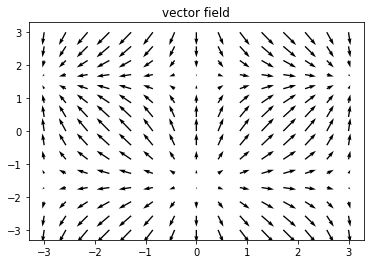

In [28]:
Vector_Plot((sin(x),cos(y)),(x,-3,3),(y,-3,3))

In [18]:
%gui qt
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from mayavi import mlab
mlab.init_notebook()
mlab.clf()

#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.gca(projection='3d')
%matplotlib inline

x,y,z = symbols('x y z')
def gradient(f):
    return (f.diff(x), f.diff(y),f.diff(z))

f = x*y**2+z**2
g = gradient(f)
g

xrange = np.linspace(-3,3,10)
yrange = np.linspace(-3,3,10)
zrange = np.linspace(-3,3,10)
X,Y,Z = np.meshgrid(xrange, yrange, zrange)

U = np.zeros((10,10,10))
V = np.zeros((10,10,10))
W = np.zeros((10,10,10))

for i in range(len(xrange)):
    for j in range(len(yrange)):
        for k in range(len(zrange)):
            x1 = X[i,j,k]
            y1 = Y[i,j,k]
            z1 = Z[i,j,k]
            U[i,j,k] = g[0].subs({x:x1, y:y1, z:z1})
            V[i,j,k] = g[1].subs({x:x1, y:y1, z:z1})
            W[i,j,k] = g[2].subs({x:x1, y:y1, z:z1})

        
#ax.quiver(X,Y,Z,U,V,W)
#quiver3d(X,Y,Z,U,V,W)
src = mlab.pipeline.vector_field(u, v, w)
mlab.pipeline.vectors(src, mask_points=20, scale_factor=3)
# plt.title("vector field")
#plt.show()

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [40]:
def Vector_Plot_3D_mayavi(f, a, b, c, mask_points=1, scale_factor=3, mesh_size=10):
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    %gui qt
    
    from mayavi import mlab   
    #mlab.init_notebook()
    #mlab.clf()
    import numpy as np
    #import matplotlib.pyplot as plt
    #%matplotlib notebook
    
# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    mlab.init_notebook()
    mlab.clf()
    src = mlab.pipeline.vector_field(u, v, w)
    mlab.pipeline.vectors(src, mask_points=mask_points, scale_factor=scale_factor)
    #mlab.pipeline.vector_cut_plane(src, mask_points=2, scale_factor=3)
    #mlab.savefig('test.jpg')

In [47]:
from sympy import *
x,y,z = symbols("x y z")
Vector_Plot_3D_mayavi((x,y,z), (x,-10,10),(y,-10,10),(z,-10,20))

Notebook initialized with ipy backend.


In [26]:
from mayavi import mlab

mlab.init_notebook()
mlab.test_plot3d()

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [25]:
from sympy.physics.vector import ReferenceFrame
R = ReferenceFrame('R')

In [45]:
x*R[1]

R_y*x

In [46]:
diff(x*R[1],x)

R_y

In [50]:
R.indices

['x', 'y', 'z']

In [52]:
from sympy.vector import CoordSys3D 
C = CoordSys3D('C')

In [54]:
C.i

C.i

In [5]:
%gui qt

from mayavi import mlab
mlab.init_notebook()
mlab.clf()
import numpy as np

def V(x, y, z):
    """ A 3D sinusoidal lattice with a parabolic confinement. """
    return np.cos(10*x) + np.cos(10*y) + np.cos(10*z) + 2*(x**2 + y**2 + z**2)
X, Y, Z = np.mgrid[-2:2:100j, -2:2:100j, -2:2:100j]
mlab.contour3d(X, Y, Z, V)

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [7]:
def vahid(*args):
    for item in args:
        print(item)

In [9]:
vahid((u,2),(v,3))

(u, 2)
(v, 3)
